In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('watson_healthcare_modified.csv')

In [200]:
df.head(15)

Employee_ID  Age Attrition     BusinessTravel  DailyRate  Department  \
0       1313919   41        No      Travel_Rarely       1102  Cardiology   
1       1200302   49        No  Travel_Frequently        279   Maternity   
2       1060315   37       Yes      Travel_Rarely       1373   Maternity   
3       1272912   33        No  Travel_Frequently       1392   Maternity   
4       1414939   27        No      Travel_Rarely        591   Maternity   
5       1633361   32        No  Travel_Frequently       1005   Maternity   
6       1329390   59        No      Travel_Rarely       1324   Maternity   
7       1699288   30        No      Travel_Rarely       1358   Maternity   
8       1469740   38        No  Travel_Frequently        216   Maternity   
9       1101291   36        No      Travel_Rarely       1299   Maternity   
10      1430504   35        No      Travel_Rarely        809   Maternity   
11      1196281   29        No      Travel_Rarely        153   Maternity   
12      1207951   31        No      Travel_Rarely        670   Maternity   
13      1080660   34        No      Travel_Rarely       1346   Maternity   
14      1420391   28       Yes      Travel_Rarely        103   Maternity   

    DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                  1          2  Life Sciences              1  ...   
1                  8          1  Life Sciences              1  ...   
2                  2          2          Other              1  ...   
3                  3          4  Life Sciences              1  ...   
4                  2          1        Medical              1  ...   
5                  2          2  Life Sciences              1  ...   
6                  3          3        Medical              1  ...   
7                 24          1  Life Sciences              1  ...   
8                 23          3  Life Sciences              1  ...   
9                 27          3        Medical              1  ...   
10                16          3        Medical              1  ...   
11                15          2  Life Sciences              1  ...   
12                26          1  Life Sciences              1  ...   
13                19          2        Medical              1  ...   
14                24          3  Life Sciences              1  ...   

    RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                          1            80      0                  8   
1                          4            80      1                 10   
2                          2            80      0                  7   
3                          3            80      0                  8   
4                          4            80      1                  6   
5                          3            80      0                  8   
6                          1            80      3                 12   
7                          2            80      1                  1   
8                          2            80      0                 10   
9                          2            80      2                 17   
10                         3            80      1                  6   
11                         4            80      0                 10   
12                         4            80      1                  5   
13                         3            80      1                  3   
14                         2            80      0                  6   

    TrainingTimesLastYear WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                       0               1               6                  4   
1                       3               3              10                  7   
2                       3               3               0                  0   
3                       3               3               8                  7   
4                       3               3               2                  2   
5                       2        

In [4]:
# sns.pairplot(df)

In [5]:
ds_size = len(df)
print(ds_size)
print('% unique values in each column')
for cols in df.columns:
#     print(f'{cols} = {round(len(df[cols].unique())*100/ds_size,2)}%')
    print(f'{cols} = {len(df[cols].unique())}')

1676
% unique values in each column
Employee_ID = 1676
Age = 43
Attrition = 2
BusinessTravel = 3
DailyRate = 886
Department = 3
DistanceFromHome = 29
Education = 5
EducationField = 6
EmployeeCount = 1
EnvironmentSatisfaction = 4
Gender = 2
HourlyRate = 71
JobInvolvement = 4
JobLevel = 5
JobRole = 5
JobSatisfaction = 4
MaritalStatus = 3
MonthlyIncome = 1349
MonthlyRate = 1427
NumCompaniesWorked = 10
Over18 = 1
OverTime = 2
PercentSalaryHike = 15
PerformanceRating = 2
RelationshipSatisfaction = 4
StandardHours = 1
Shift = 4
TotalWorkingYears = 40
TrainingTimesLastYear = 7
WorkLifeBalance = 4
YearsAtCompany = 37
YearsInCurrentRole = 19
YearsSinceLastPromotion = 16
YearsWithCurrManager = 18


#### Target Variable is 'Attrition'

In [6]:
df.describe()

Employee_ID          Age    DailyRate  DistanceFromHome    Education  \
count  1.676000e+03  1676.000000  1676.000000       1676.000000  1676.000000   
mean   1.456796e+06    36.866348   800.557876          9.221957     2.907518   
std    2.487486e+05     9.129126   401.594438          8.158118     1.025835   
min    1.025177e+06    18.000000   102.000000          1.000000     1.000000   
25%    1.235832e+06    30.000000   465.000000          2.000000     2.000000   
50%    1.464606e+06    36.000000   796.500000          7.000000     3.000000   
75%    1.667992e+06    43.000000  1157.000000         14.000000     4.000000   
max    1.886378e+06    60.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count         1676.0              1676.000000  1676.000000     1676.000000   
mean             1.0                 2.714797    65.470167        2.724940   
std              0.0                 1.097534    20.207572        0.714121   
min              1.0                 1.000000    30.000000        1.000000   
25%              1.0                 2.000000    48.000000        2.000000   
50%              1.0                 3.000000    65.500000        3.000000   
75%              1.0                 4.000000    83.000000        3.000000   
max              1.0                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours        Shift  \
count  1676.000000  ...               1676.000000         1676.0  1676.000000   
mean      2.066826  ...                  2.718377           80.0     0.806086   
std       1.113423  ...                  1.078162            0.0     0.855527   
min       1.000000  ...                  1.000000           80.0     0.000000   
25%       1.000000  ...                  2.000000           80.0     0.000000   
50%       2.000000  ...                  3.000000           80.0     1.000000   
75%       3.000000  ...                  4.000000           80.0     1.000000   
max       5.000000  ...                  4.000000           80.0     3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1676.000000            1676.000000      1676.000000   
mean           11.338902               2.805489         2.766110   
std             7.834996               1.288431         0.702369   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1676.000000         1676.000000              1676.000000   
mean         7.033413            4.264916                 2.200477   
std          6.098991            3.627456                 3.229587   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%         10.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  
count           1676.000000  
mean               4.135442  
std                3.559662  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000  

[8 rows x 26 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee_ID               1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [8]:
# df.columns

In [9]:
## Selecting only numeric based columns
df_numeric = df.select_dtypes(exclude='object').copy()
# df.select_dtypes(exclude='object').columns

In [10]:
## Selecting only object based columns
df.select_dtypes(include='object')

Attrition     BusinessTravel  Department    EducationField  Gender  \
0           No      Travel_Rarely  Cardiology     Life Sciences  Female   
1           No  Travel_Frequently   Maternity     Life Sciences    Male   
2          Yes      Travel_Rarely   Maternity             Other    Male   
3           No  Travel_Frequently   Maternity     Life Sciences  Female   
4           No      Travel_Rarely   Maternity           Medical    Male   
...        ...                ...         ...               ...     ...   
1671       Yes      Travel_Rarely   Neurology  Technical Degree    Male   
1672        No      Travel_Rarely  Cardiology         Marketing  Female   
1673        No      Travel_Rarely   Maternity     Life Sciences  Female   
1674        No      Travel_Rarely   Neurology     Life Sciences  Female   
1675        No      Travel_Rarely  Cardiology           Medical  Female   

        JobRole MaritalStatus Over18 OverTime  
0         Nurse        Single      Y      Yes  
1         Other       Married      Y       No  
2         Nurse        Single      Y      Yes  
3         Other       Married      Y      Yes  
4         Nurse       Married      Y       No  
...         ...           ...    ...      ...  
1671      Nurse        Single      Y      Yes  
1672      Nurse       Married      Y      Yes  
1673      Other        Single      Y       No  
1674  Therapist       Married      Y       No  
1675      Nurse        Single      Y       No  

[1676 rows x 9 columns]

In [11]:
for cols in df_numeric.columns:
    print(f' {cols} : \n{df_numeric[cols].value_counts()} \n')

 Employee_ID : 
1313919    1
1604086    1
1788553    1
1638427    1
1828789    1
          ..
1446447    1
1446990    1
1639147    1
1855799    1
1152329    1
Name: Employee_ID, Length: 1676, dtype: int64 

 Age : 
35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: Age, dtype: int64 

 DailyRate : 
691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: DailyRate, Length: 886, dtype: int64 

 DistanceFromHome : 
2     241
1     239
10     99
3      96
7      95
9      93
8      89
5      76
6      72
4      69
16     38
24     34
29     33
23     33
11     33
25     29
15     29
26     28
18

In [12]:
# df.value_counts()

##### Can use 
- DistanceFromHome
- Age
- DailyRate
- HourlyRate
- MonthlyIncome (Check for outliers)
- MonthlyRate 
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

In [13]:
df['Attrition'].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

In [14]:
df['PerformanceRating'].value_counts()

3    1424
4     252
Name: PerformanceRating, dtype: int64

In [15]:
df_orig = df.copy()
box1 = px.box(df['DistanceFromHome'],width=600,height=500,points='all')
box2 = px.box(df['Age'],width=600,height=500,points='all')
box3 = px.box(df['DailyRate'],width=600,height=500,points='all')
box4 = px.box(df['HourlyRate'],width=600,height=500,points='all')
box5 = px.box(df['MonthlyIncome'],width=600,height=500,points='all') 
box6 = px.box(df['MonthlyRate'],width=600,height=500,points='all') 
box7 = px.box(df['PercentSalaryHike'],width=600,height=500,points='all') 
box8 = px.box(df['TotalWorkingYears'],width=600,height=500,points='all')
box9 = px.box(df['YearsAtCompany'],width=600,height=500,points='all')
box10 = px.box(df['YearsInCurrentRole'],width=600,height=500,points='all')
box11 = px.box(df['YearsSinceLastPromotion'],width=600,height=500,points='all')
box12 = px.box(df['YearsWithCurrManager'],width=600,height=500,points='all')

In [16]:
# box1.show()
"""
Column: DistanceFromHome
No outliers
Max: 29
Min: 1
Median: 7
Box Limit: 2 to 14
"""


'\nColumn: DistanceFromHome\nNo outliers\nMax: 29\nMin: 1\nMedian: 7\nBox Limit: 2 to 14\n'

In [17]:
# box2.show()
"""
Column: Age
Outliers: None
Max: 60
Min: 18
Median: 36 
Box Limit: 30-43
"""

'\nColumn: Age\nOutliers: None\nMax: 60\nMin: 18\nMedian: 36 \nBox Limit: 30-43\n'

In [18]:
# box3.show()
"""
Column: DailyRate
Outliers: None
Max: 1499
Min: 102
Median: 796.5
Box Limit: 465 - 1157
"""

'\nColumn: DailyRate\nOutliers: None\nMax: 1499\nMin: 102\nMedian: 796.5\nBox Limit: 465 - 1157\n'

In [19]:
# box4.show()
"""
Column: HourlyRate
Outliers: None 
Max: 100
Min: 30
Median: 65.5
Box Limit: 48 - 83
"""

'\nColumn: HourlyRate\nOutliers: None \nMax: 100\nMin: 30\nMedian: 65.5\nBox Limit: 48 - 83\n'

In [20]:
box5.show()
"""
Column: MonthlyIncome
Outliers: Yes (Above 16555 to 19.999k)
Max: 16555
Min: 1009
Median: 4899
Box Limit: 2927.5 - 8380.5
"""

'\nColumn: MonthlyIncome\nOutliers: Yes (Above 16555 to 19.999k)\nMax: 16555\nMin: 1009\nMedian: 4899\nBox Limit: 2927.5 - 8380.5\n'

In [21]:
quart1 = df['MonthlyIncome'].quantile(0.25)
quart3 = df['MonthlyIncome'].quantile(0.75)
iqr = quart3-quart1
lower_lim = quart1 - 1.5*iqr
if lower_lim<=0:
    lower_lim = min(df['MonthlyIncome'])
upper_lim = quart3 + 2*iqr
print(f'Quartile1: {quart1}\nQuartile3: {quart3}\nIQR: {iqr}\nLower Limit: {lower_lim}\nUpper Limit: {upper_lim}')
print(f"Maximum: {max(df['MonthlyIncome'])}")

Quartile1: 2928.25
Quartile3: 8380.25
IQR: 5452.0
Lower Limit: 1009
Upper Limit: 19284.25
Maximum: 19999


In [22]:
outlier_low = df['MonthlyIncome'] < lower_lim
outlier_high = df['MonthlyIncome'] > upper_lim
# outlier_high
df = df[~(outlier_low | outlier_high)].copy()


In [23]:
len(df)

1641

In [24]:
# box6.show()
"""
Column: MonthlyRate
Outliers: None
Max: 26.999k
Min: 2094
Median: 14.269k
Box Limit: 7987 - 20.462k
"""

'\nColumn: MonthlyRate\nOutliers: None\nMax: 26.999k\nMin: 2094\nMedian: 14.269k\nBox Limit: 7987 - 20.462k\n'

In [25]:
# box7.show()
"""
Column: PercentSalaryHike 
Outliers: None
Max: 25
Min: 11
Median: 14
Box Limit: 12-18 
"""

'\nColumn: PercentSalaryHike \nOutliers: None\nMax: 25\nMin: 11\nMedian: 14\nBox Limit: 12-18 \n'

In [26]:
box8.show()
"""
Column: TotalWorkingYears
Outliers: Yes
Max: 28
Min: 0
Median: 10
Box Limit: 6-15
"""

'\nColumn: TotalWorkingYears\nOutliers: Yes\nMax: 28\nMin: 0\nMedian: 10\nBox Limit: 6-15\n'

In [27]:
quart1twy = df['TotalWorkingYears'].quantile(0.25)
quart3twy = df['TotalWorkingYears'].quantile(0.75)
iqrtwy = quart3twy-quart1twy
lower_limtwy = quart1twy - 1.5*iqrtwy
if lower_limtwy<=0:
    lower_limtwy = min(df['TotalWorkingYears'])
upper_limtwy = quart3twy + 2*iqrtwy
print(f'Quartile1: {quart1twy}\nQuartile3: {quart3twy}\nIQR: {iqrtwy}\nLower Limit: {lower_limtwy}\nUpper Limit: {upper_limtwy}')
print(f"Maximum: {max(df['TotalWorkingYears'])}")

Quartile1: 6.0
Quartile3: 15.0
IQR: 9.0
Lower Limit: 0
Upper Limit: 33.0
Maximum: 40


In [28]:
outlier_lowtwy = df['TotalWorkingYears'] <= lower_limtwy
outlier_hightwy = df['TotalWorkingYears'] >= upper_limtwy
# outlier_high
df = df[~(outlier_lowtwy | outlier_hightwy)].copy()

In [29]:
len(df)#,print('removed: ',len(df[(outlier_lowtwy | outlier_hightwy)]))

1604

In [30]:
box9.show()
"""
Column: YearsAtCompany
Outliers: Yes
Max: 20
Min: 3
Median: 5
Box Limit: 3 - 10 
"""

'\nColumn: YearsAtCompany\nOutliers: Yes\nMax: 20\nMin: 3\nMedian: 5\nBox Limit: 3 - 10 \n'

In [31]:
quart1yac = df['YearsAtCompany'].quantile(0.25)
quart3yac = df['YearsAtCompany'].quantile(0.75)
iqryac = quart3yac-quart1yac
lower_limyac = quart1yac - 1.5*iqryac
if lower_limyac<=0:
    lower_limyac = min(df['YearsAtCompany'])
upper_limyac = quart3yac + 2*iqryac
print(f'Quartile1: {quart1yac}\nQuartile3: {quart3yac}\nIQR: {iqryac}\nLower Limit: {lower_limyac}\nUpper Limit: {upper_limyac}')
print(f"Maximum: {max(df['YearsAtCompany'])}")

Quartile1: 3.0
Quartile3: 9.0
IQR: 6.0
Lower Limit: 0
Upper Limit: 21.0
Maximum: 32


In [32]:
outlier_lowyac = df['YearsAtCompany'] < lower_limyac
outlier_highyac = df['YearsAtCompany'] > upper_limyac
# outlier_high
df = df[~(outlier_lowyac | outlier_highyac)].copy()


In [33]:
len(df)#,print('removed: ',len(df[(outlier_lowyac | outlier_highyac)]))

1564

In [34]:
box10.show()
"""
Column: YearsInCurrentRole
Outliers: Yes
Max: 14
Min: 2
Median: 3 
Box Limit: 2-7 
"""

'\nColumn: YearsInCurrentRole\nOutliers: Yes\nMax: 14\nMin: 2\nMedian: 3 \nBox Limit: 2-7 \n'

In [35]:
quart1yicr = df['YearsInCurrentRole'].quantile(0.25)
quart3yicr = df['YearsInCurrentRole'].quantile(0.75)
iqryicr = quart3yicr-quart1yicr
lower_limyicr = quart1yicr - 1.5*iqryicr
if lower_limyicr<=0:
    lower_limyicr = min(df['YearsInCurrentRole'])
upper_limyicr = quart3yicr + 1.7*iqryicr
print(f'Quartile1: {quart1yicr}\nQuartile3: {quart3yicr}\nIQR: {iqryicr}\nLower Limit: {lower_limyicr}\nUpper Limit: {upper_limyicr}')
print(f"Maximum: {max(df['YearsInCurrentRole'])}")

Quartile1: 2.0
Quartile3: 7.0
IQR: 5.0
Lower Limit: 0
Upper Limit: 15.5
Maximum: 17


In [36]:
outlier_lowyicr = df['YearsInCurrentRole'] < lower_limyicr
outlier_highyicr = df['YearsInCurrentRole'] > upper_limyicr
# outlier_high
df = df[~(outlier_lowyicr | outlier_highyicr)].copy()

In [37]:
len(df)#,print('removed: ',len(df[(outlier_lowyicr | outlier_highyicr)]))

1557

In [38]:
box11.show()
"""
Column: YearsSinceLastPromotion
Outliers: Yes
Max: 7
Min: 0
Median: 1
Box Limit: 0-3
"""

'\nColumn: YearsSinceLastPromotion\nOutliers: Yes\nMax: 7\nMin: 0\nMedian: 1\nBox Limit: 0-3\n'

In [39]:
quart1_yslp = df['YearsSinceLastPromotion'].quantile(0.25)
quart3_yslp = df['YearsSinceLastPromotion'].quantile(0.75)
iqr_yslp = quart3_yslp-quart1_yslp
lower_lim_yslp = quart1_yslp - 1.5*iqr_yslp
if lower_lim_yslp<=0:
    lower_lim_yslp = min(df['YearsSinceLastPromotion'])
upper_lim_yslp = quart3_yslp + 5*iqr_yslp #Making top range to 12
print(f'Quartile1: {quart1_yslp}\nQuartile3: {quart3_yslp}\nIQR: {iqr_yslp}\nLower Limit: {lower_lim_yslp}\nUpper Limit: {upper_lim_yslp}')
print(f"Maximum: {max(df['YearsSinceLastPromotion'])}")

Quartile1: 0.0
Quartile3: 2.0
IQR: 2.0
Lower Limit: 0
Upper Limit: 12.0
Maximum: 15


In [40]:
## Since there are many outliers we might giveéclassify them as a new class

In [41]:
outlier_low_yslp = df['YearsSinceLastPromotion'] < lower_lim_yslp
outlier_high_yslp = df['YearsSinceLastPromotion'] > upper_lim_yslp
# outlier_high
df = df[~(outlier_low_yslp | outlier_high_yslp)].copy()

In [42]:
len(df)#,print('removed: ',len(df[(outlier_low_yslp | outlier_high_yslp)]))

1545

.

In [43]:
box12.show()
"""
Column: YearsWithCurrManager
Outliers: Yes
Max: 14
Min: 0
Median: 3
Box Limit: 2-7 
"""

'\nColumn: YearsWithCurrManager\nOutliers: Yes\nMax: 14\nMin: 0\nMedian: 3\nBox Limit: 2-7 \n'

In [44]:
quart1 = df['YearsWithCurrManager'].quantile(0.25)
quart3 = df['YearsWithCurrManager'].quantile(0.75)
iqr = quart3-quart1
lower_lim = quart1 - 1.5*iqr
if lower_lim<=0:
    lower_lim = min(df['YearsWithCurrManager'])
upper_lim = quart3 + 1.7*iqr
print(f'Quartile1: {quart1}\nQuartile3: {quart3}\nIQR: {iqr}\nLower Limit: {lower_lim}\nUpper Limit: {upper_lim}')
print(f"Maximum: {max(df['YearsWithCurrManager'])}")

Quartile1: 2.0
Quartile3: 7.0
IQR: 5.0
Lower Limit: 0
Upper Limit: 15.5
Maximum: 17


In [45]:
outlier_low = df['YearsInCurrentRole'] < lower_lim
outlier_high = df['YearsInCurrentRole'] > upper_lim
# outlier_high
df = df[~(outlier_low | outlier_high)].copy()


In [46]:
len(df)#,print('removed: ',len(df[(outlier_low | outlier_high)]))

1545

#### Removing the outliers outside 1.5IQR +-

In [47]:
# df_upd1.head()
# df_upd2.head()
# df_upd3.head()
# df_upd4.head()
# df_upd5.head()
# df_upd6.head()

In [48]:
len(df_orig),len(df)

(1676, 1545)

In [49]:
df['Attrition'].value_counts()

No     1355
Yes     190
Name: Attrition, dtype: int64

In [50]:
## Try Over Sampling too

##### https://towardsdatascience.com/feature-handling-3f14c12ecbb8
##### https://plotly.com/python/setting-graph-size/

## PHASE 1 ##
### Without Removing the Outliers ###

## Models and TrainTestSplit



In [51]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [52]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [53]:
df_orig.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [54]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [55]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [56]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [57]:
df_copy = df_orig.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

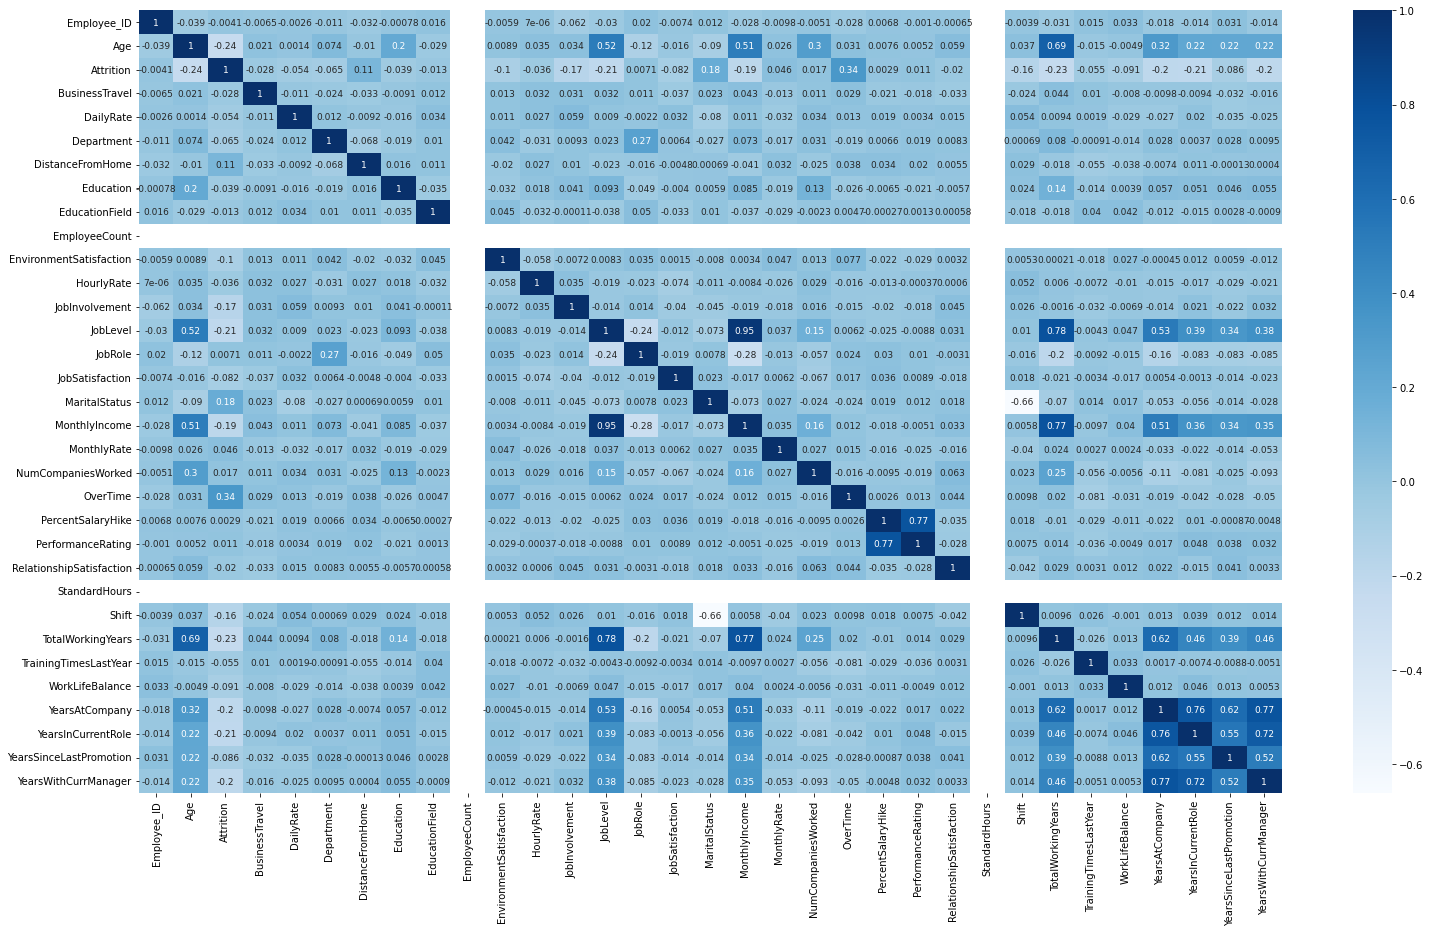

In [58]:

# corr_val_1 = df_copy.corr()
# sns.heatmap(corr_val_1,cmap='Blues',annot=True)

corr_val_1 = df_copy.corr()
fig,ax = plt.subplots(figsize=(25.6,14.4))
fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})

In [59]:
y = df_copy['Attrition']

X = df_copy[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus',
        'OverTime','Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'
]]

In [60]:
# df_copy.corr()['Attrition']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)

In [62]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1340, 32), (1340,), (336, 32), (336,))

### Random Forest ###

In [63]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rf_1_acc = accuracy_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



In [64]:
rf_1_prec = precision_score(y_test, y_pred)
rf_1_rec = recall_score(y_test,y_pred)
rf_1_f1 = f1_score(y_test, y_pred)

In [65]:
rf_1_classification_report = classification_report(y_test,y_pred)
print(rf_1_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       297
           1       0.65      0.38      0.48        39

    accuracy                           0.90       336
   macro avg       0.79      0.68      0.72       336
weighted avg       0.89      0.90      0.89       336



https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [66]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)

In [68]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_score_xgb

0.9166666666666666

In [69]:
xgb_1_prec = precision_score(y_test, y_pred_xgb)
xgb_1_rec = recall_score(y_test,y_pred_xgb)
xgb_1_f1 = f1_score(y_test, y_pred_xgb)

In [70]:
xgb_1_classification_report = classification_report(y_test,y_pred_xgb)
print(xgb_1_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       297
           1       0.69      0.51      0.59        39

    accuracy                           0.92       336
   macro avg       0.81      0.74      0.77       336
weighted avg       0.91      0.92      0.91       336



### CatBoost ###

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)

In [72]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost = catboost_model.predict(X_test)
accuracy_score_cat = accuracy_score(y_test,y_pred_catboost)
accuracy_score_cat

Learning rate set to 0.011674
0:	learn: 0.6765151	total: 155ms	remaining: 2m 34s
1:	learn: 0.6624983	total: 159ms	remaining: 1m 19s
2:	learn: 0.6474093	total: 163ms	remaining: 54.1s
3:	learn: 0.6342587	total: 166ms	remaining: 41.5s
4:	learn: 0.6256160	total: 170ms	remaining: 33.9s
5:	learn: 0.6134187	total: 174ms	remaining: 28.8s
6:	learn: 0.6049881	total: 180ms	remaining: 25.6s
7:	learn: 0.5919190	total: 186ms	remaining: 23.1s
8:	learn: 0.5792644	total: 192ms	remaining: 21.1s
9:	learn: 0.5672647	total: 198ms	remaining: 19.6s
10:	learn: 0.5564978	total: 204ms	remaining: 18.3s
11:	learn: 0.5452754	total: 211ms	remaining: 17.4s
12:	learn: 0.5355623	total: 215ms	remaining: 16.3s
13:	learn: 0.5241967	total: 218ms	remaining: 15.4s
14:	learn: 0.5166189	total: 222ms	remaining: 14.6s
15:	learn: 0.5067408	total: 225ms	remaining: 13.9s
16:	learn: 0.4968742	total: 229ms	remaining: 13.3s
17:	learn: 0.4895536	total: 233ms	remaining: 12.7s
18:	learn: 0.4791587	total: 237ms	remaining: 12.2s
19:	learn

191:	learn: 0.1480536	total: 1.07s	remaining: 4.52s
192:	learn: 0.1475468	total: 1.08s	remaining: 4.51s
193:	learn: 0.1469987	total: 1.08s	remaining: 4.51s
194:	learn: 0.1463594	total: 1.09s	remaining: 4.51s
195:	learn: 0.1459780	total: 1.1s	remaining: 4.5s
196:	learn: 0.1455176	total: 1.11s	remaining: 4.53s
197:	learn: 0.1451246	total: 1.12s	remaining: 4.54s
198:	learn: 0.1446148	total: 1.13s	remaining: 4.54s
199:	learn: 0.1443228	total: 1.13s	remaining: 4.54s
200:	learn: 0.1438317	total: 1.14s	remaining: 4.54s
201:	learn: 0.1432887	total: 1.15s	remaining: 4.53s
202:	learn: 0.1429859	total: 1.15s	remaining: 4.53s
203:	learn: 0.1425691	total: 1.16s	remaining: 4.52s
204:	learn: 0.1420853	total: 1.16s	remaining: 4.51s
205:	learn: 0.1415206	total: 1.17s	remaining: 4.49s
206:	learn: 0.1410496	total: 1.17s	remaining: 4.48s
207:	learn: 0.1406766	total: 1.17s	remaining: 4.47s
208:	learn: 0.1402692	total: 1.18s	remaining: 4.46s
209:	learn: 0.1398370	total: 1.18s	remaining: 4.45s
210:	learn: 0.

355:	learn: 0.0958248	total: 1.8s	remaining: 3.26s
356:	learn: 0.0956561	total: 1.8s	remaining: 3.25s
357:	learn: 0.0954435	total: 1.81s	remaining: 3.25s
358:	learn: 0.0951957	total: 1.82s	remaining: 3.25s
359:	learn: 0.0951179	total: 1.82s	remaining: 3.24s
360:	learn: 0.0948276	total: 1.83s	remaining: 3.24s
361:	learn: 0.0946478	total: 1.83s	remaining: 3.23s
362:	learn: 0.0943560	total: 1.84s	remaining: 3.23s
363:	learn: 0.0941537	total: 1.84s	remaining: 3.22s
364:	learn: 0.0939757	total: 1.84s	remaining: 3.21s
365:	learn: 0.0937144	total: 1.85s	remaining: 3.2s
366:	learn: 0.0934878	total: 1.85s	remaining: 3.2s
367:	learn: 0.0932182	total: 1.86s	remaining: 3.19s
368:	learn: 0.0929909	total: 1.86s	remaining: 3.18s
369:	learn: 0.0928162	total: 1.86s	remaining: 3.17s
370:	learn: 0.0925588	total: 1.87s	remaining: 3.17s
371:	learn: 0.0923653	total: 1.87s	remaining: 3.16s
372:	learn: 0.0921861	total: 1.88s	remaining: 3.15s
373:	learn: 0.0919845	total: 1.88s	remaining: 3.15s
374:	learn: 0.09

557:	learn: 0.0663287	total: 2.71s	remaining: 2.15s
558:	learn: 0.0662801	total: 2.72s	remaining: 2.14s
559:	learn: 0.0660949	total: 2.72s	remaining: 2.14s
560:	learn: 0.0659731	total: 2.73s	remaining: 2.14s
561:	learn: 0.0657807	total: 2.73s	remaining: 2.13s
562:	learn: 0.0656776	total: 2.74s	remaining: 2.12s
563:	learn: 0.0656049	total: 2.74s	remaining: 2.12s
564:	learn: 0.0655255	total: 2.75s	remaining: 2.12s
565:	learn: 0.0653683	total: 2.75s	remaining: 2.11s
566:	learn: 0.0652977	total: 2.76s	remaining: 2.11s
567:	learn: 0.0651996	total: 2.77s	remaining: 2.1s
568:	learn: 0.0650726	total: 2.77s	remaining: 2.1s
569:	learn: 0.0649912	total: 2.78s	remaining: 2.1s
570:	learn: 0.0648740	total: 2.79s	remaining: 2.09s
571:	learn: 0.0647916	total: 2.79s	remaining: 2.09s
572:	learn: 0.0646446	total: 2.8s	remaining: 2.08s
573:	learn: 0.0645748	total: 2.8s	remaining: 2.08s
574:	learn: 0.0644057	total: 2.81s	remaining: 2.08s
575:	learn: 0.0643131	total: 2.81s	remaining: 2.07s
576:	learn: 0.064

756:	learn: 0.0499094	total: 3.66s	remaining: 1.18s
757:	learn: 0.0498855	total: 3.66s	remaining: 1.17s
758:	learn: 0.0498301	total: 3.67s	remaining: 1.17s
759:	learn: 0.0497678	total: 3.67s	remaining: 1.16s
760:	learn: 0.0496854	total: 3.68s	remaining: 1.16s
761:	learn: 0.0496279	total: 3.69s	remaining: 1.15s
762:	learn: 0.0495609	total: 3.69s	remaining: 1.15s
763:	learn: 0.0495504	total: 3.69s	remaining: 1.14s
764:	learn: 0.0495428	total: 3.7s	remaining: 1.14s
765:	learn: 0.0495280	total: 3.7s	remaining: 1.13s
766:	learn: 0.0494502	total: 3.71s	remaining: 1.13s
767:	learn: 0.0493889	total: 3.71s	remaining: 1.12s
768:	learn: 0.0493026	total: 3.71s	remaining: 1.11s
769:	learn: 0.0491800	total: 3.72s	remaining: 1.11s
770:	learn: 0.0491456	total: 3.72s	remaining: 1.1s
771:	learn: 0.0490837	total: 3.72s	remaining: 1.1s
772:	learn: 0.0490192	total: 3.73s	remaining: 1.09s
773:	learn: 0.0489369	total: 3.73s	remaining: 1.09s
774:	learn: 0.0488610	total: 3.74s	remaining: 1.08s
775:	learn: 0.04

943:	learn: 0.0387315	total: 4.42s	remaining: 263ms
944:	learn: 0.0386453	total: 4.43s	remaining: 258ms
945:	learn: 0.0386056	total: 4.44s	remaining: 253ms
946:	learn: 0.0385381	total: 4.45s	remaining: 249ms
947:	learn: 0.0385322	total: 4.45s	remaining: 244ms
948:	learn: 0.0385269	total: 4.46s	remaining: 240ms
949:	learn: 0.0384771	total: 4.46s	remaining: 235ms
950:	learn: 0.0384515	total: 4.47s	remaining: 230ms
951:	learn: 0.0383785	total: 4.48s	remaining: 226ms
952:	learn: 0.0383406	total: 4.48s	remaining: 221ms
953:	learn: 0.0382766	total: 4.49s	remaining: 216ms
954:	learn: 0.0382260	total: 4.5s	remaining: 212ms
955:	learn: 0.0381456	total: 4.5s	remaining: 207ms
956:	learn: 0.0381074	total: 4.5s	remaining: 202ms
957:	learn: 0.0380781	total: 4.51s	remaining: 198ms
958:	learn: 0.0380731	total: 4.51s	remaining: 193ms
959:	learn: 0.0380565	total: 4.52s	remaining: 188ms
960:	learn: 0.0380128	total: 4.52s	remaining: 183ms
961:	learn: 0.0379798	total: 4.52s	remaining: 179ms
962:	learn: 0.0

0.9136904761904762

In [73]:
accuracy_score_cat

0.9136904761904762

In [74]:
cat_1_prec = precision_score(y_test, y_pred_catboost)
cat_1_rec = recall_score(y_test,y_pred_catboost)
cat_1_f1 = f1_score(y_test, y_pred_catboost)

In [75]:
cat_1_classification_report = classification_report(y_test,y_pred_catboost)
print(cat_1_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.69      0.46      0.55        39

    accuracy                           0.91       336
   macro avg       0.81      0.72      0.75       336
weighted avg       0.90      0.91      0.91       336



## PHASE 2 ##
### Removing/Dealing with Outliers
- To deal with outliers I will first remove all to try improve the results
- Second approach will be to replace the values by the mean value or a new value (categorical kind)


## Models and TrainTestSplit



In [76]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [77]:
df.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [78]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [79]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [80]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [81]:
df_copy = df.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

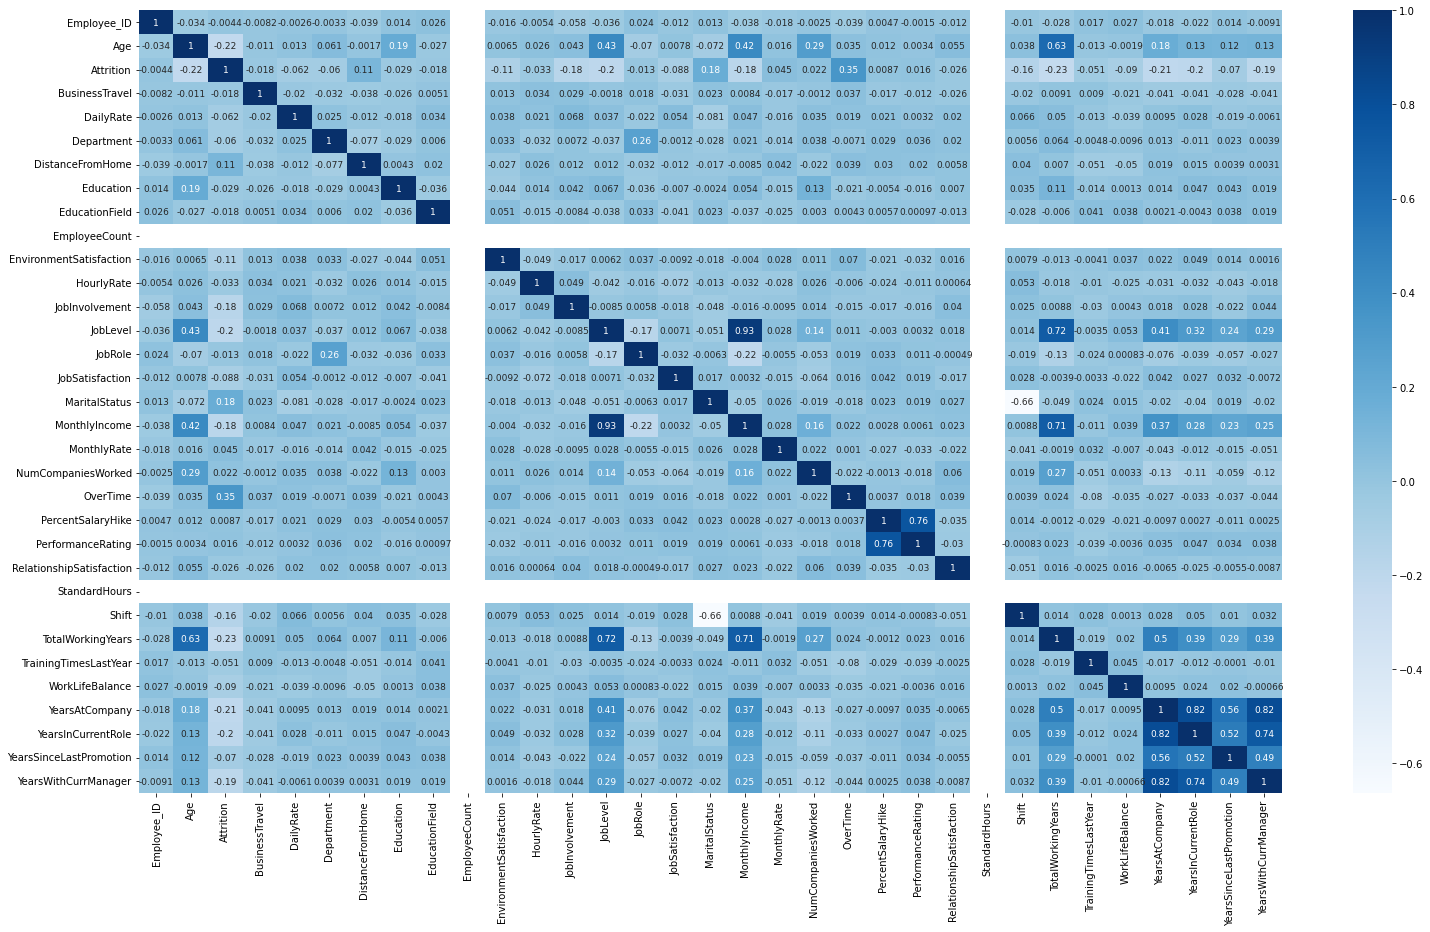

In [82]:
corr_val_1 = df_copy.corr()
fig,ax = plt.subplots(figsize=(25.6,14.4))
fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})

In [83]:
y = df_copy['Attrition']

X = df_copy[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus',
        'OverTime','Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'
]]

In [84]:
# df_copy.corr()['Attrition']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [86]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1236, 32), (1236,), (309, 32), (309,))

### Random Forest ###

In [87]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=42)
clf.fit(X_train, y_train)
y_pred_rf_2 = clf.predict(X_test)
accuracy_score(y_test, y_pred_rf_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.9158576051779935

In [88]:
rf_2_acc = accuracy_score(y_test, y_pred_rf_2)
rf_2_prec = precision_score(y_test, y_pred_rf_2)
rf_2_rec = recall_score(y_test, y_pred_rf_2)
rf_2_f1 = f1_score(y_test, y_pred_rf_2)
rf_2_class_rep = classification_report(y_test, y_pred_rf_2)

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [89]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [90]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [91]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_score_xgb

0.9385113268608414

In [92]:
xgb_2_acc = accuracy_score(y_test, y_pred_xgb)
xgb_2_prec = precision_score(y_test,y_pred_xgb)
xgb_2_rec = recall_score(y_test, y_pred_xgb)
xgb_2_f1 = f1_score(y_test, y_pred_xgb)
xgb_2_class_rep = classification_report(y_test, y_pred_xgb)

### CatBoost ###

In [93]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [94]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost = catboost_model.predict(X_test)
accuracy_score_cat = accuracy_score(y_test,y_pred_catboost)
accuracy_score_cat

Learning rate set to 0.011278
0:	learn: 0.6766656	total: 5.14ms	remaining: 5.13s
1:	learn: 0.6638607	total: 8.91ms	remaining: 4.45s
2:	learn: 0.6508674	total: 12.5ms	remaining: 4.17s
3:	learn: 0.6385995	total: 16.4ms	remaining: 4.08s
4:	learn: 0.6307463	total: 20.2ms	remaining: 4.02s
5:	learn: 0.6198307	total: 23.7ms	remaining: 3.93s
6:	learn: 0.6119929	total: 27.3ms	remaining: 3.87s
7:	learn: 0.6002326	total: 30ms	remaining: 3.72s
8:	learn: 0.5882603	total: 33.4ms	remaining: 3.68s
9:	learn: 0.5776142	total: 37ms	remaining: 3.66s
10:	learn: 0.5672647	total: 40.6ms	remaining: 3.65s
11:	learn: 0.5578902	total: 44.1ms	remaining: 3.63s
12:	learn: 0.5468763	total: 47.9ms	remaining: 3.64s
13:	learn: 0.5369712	total: 51.6ms	remaining: 3.63s
14:	learn: 0.5296527	total: 55.2ms	remaining: 3.62s
15:	learn: 0.5228158	total: 58.8ms	remaining: 3.62s
16:	learn: 0.5140814	total: 62.4ms	remaining: 3.6s
17:	learn: 0.5054541	total: 65.9ms	remaining: 3.6s
18:	learn: 0.4968425	total: 69.5ms	remaining: 3.59

171:	learn: 0.1669221	total: 733ms	remaining: 3.53s
172:	learn: 0.1664009	total: 739ms	remaining: 3.53s
173:	learn: 0.1657112	total: 745ms	remaining: 3.54s
174:	learn: 0.1651001	total: 752ms	remaining: 3.54s
175:	learn: 0.1645938	total: 755ms	remaining: 3.54s
176:	learn: 0.1640750	total: 761ms	remaining: 3.54s
177:	learn: 0.1633107	total: 765ms	remaining: 3.53s
178:	learn: 0.1630022	total: 768ms	remaining: 3.52s
179:	learn: 0.1623831	total: 772ms	remaining: 3.52s
180:	learn: 0.1618576	total: 776ms	remaining: 3.51s
181:	learn: 0.1613179	total: 782ms	remaining: 3.51s
182:	learn: 0.1607698	total: 785ms	remaining: 3.5s
183:	learn: 0.1603991	total: 790ms	remaining: 3.5s
184:	learn: 0.1600588	total: 793ms	remaining: 3.49s
185:	learn: 0.1592788	total: 797ms	remaining: 3.49s
186:	learn: 0.1588226	total: 800ms	remaining: 3.48s
187:	learn: 0.1584281	total: 805ms	remaining: 3.48s
188:	learn: 0.1579550	total: 809ms	remaining: 3.47s
189:	learn: 0.1573739	total: 813ms	remaining: 3.46s
190:	learn: 0.

349:	learn: 0.1032311	total: 1.47s	remaining: 2.73s
350:	learn: 0.1029884	total: 1.48s	remaining: 2.73s
351:	learn: 0.1027054	total: 1.48s	remaining: 2.73s
352:	learn: 0.1024742	total: 1.49s	remaining: 2.73s
353:	learn: 0.1022341	total: 1.49s	remaining: 2.73s
354:	learn: 0.1019602	total: 1.5s	remaining: 2.72s
355:	learn: 0.1017772	total: 1.5s	remaining: 2.72s
356:	learn: 0.1015981	total: 1.51s	remaining: 2.71s
357:	learn: 0.1012806	total: 1.51s	remaining: 2.71s
358:	learn: 0.1011500	total: 1.51s	remaining: 2.7s
359:	learn: 0.1009105	total: 1.52s	remaining: 2.7s
360:	learn: 0.1007166	total: 1.52s	remaining: 2.69s
361:	learn: 0.1005564	total: 1.52s	remaining: 2.69s
362:	learn: 0.1003699	total: 1.53s	remaining: 2.68s
363:	learn: 0.1002255	total: 1.53s	remaining: 2.68s
364:	learn: 0.1000223	total: 1.53s	remaining: 2.67s
365:	learn: 0.0998441	total: 1.54s	remaining: 2.67s
366:	learn: 0.0996147	total: 1.54s	remaining: 2.66s
367:	learn: 0.0994524	total: 1.55s	remaining: 2.65s
368:	learn: 0.09

523:	learn: 0.0729171	total: 2.19s	remaining: 1.99s
524:	learn: 0.0728344	total: 2.19s	remaining: 1.98s
525:	learn: 0.0726950	total: 2.2s	remaining: 1.98s
526:	learn: 0.0726028	total: 2.21s	remaining: 1.98s
527:	learn: 0.0724879	total: 2.21s	remaining: 1.98s
528:	learn: 0.0723548	total: 2.21s	remaining: 1.97s
529:	learn: 0.0721928	total: 2.22s	remaining: 1.97s
530:	learn: 0.0719937	total: 2.22s	remaining: 1.96s
531:	learn: 0.0718650	total: 2.23s	remaining: 1.96s
532:	learn: 0.0716748	total: 2.23s	remaining: 1.95s
533:	learn: 0.0715914	total: 2.23s	remaining: 1.95s
534:	learn: 0.0714776	total: 2.24s	remaining: 1.95s
535:	learn: 0.0712403	total: 2.24s	remaining: 1.94s
536:	learn: 0.0711221	total: 2.25s	remaining: 1.94s
537:	learn: 0.0709209	total: 2.25s	remaining: 1.93s
538:	learn: 0.0707783	total: 2.25s	remaining: 1.93s
539:	learn: 0.0706651	total: 2.26s	remaining: 1.92s
540:	learn: 0.0705513	total: 2.26s	remaining: 1.92s
541:	learn: 0.0703676	total: 2.26s	remaining: 1.91s
542:	learn: 0

698:	learn: 0.0528704	total: 2.92s	remaining: 1.25s
699:	learn: 0.0528027	total: 2.92s	remaining: 1.25s
700:	learn: 0.0527118	total: 2.93s	remaining: 1.25s
701:	learn: 0.0526153	total: 2.93s	remaining: 1.25s
702:	learn: 0.0525730	total: 2.94s	remaining: 1.24s
703:	learn: 0.0524725	total: 2.94s	remaining: 1.24s
704:	learn: 0.0523814	total: 2.94s	remaining: 1.23s
705:	learn: 0.0522504	total: 2.95s	remaining: 1.23s
706:	learn: 0.0521613	total: 2.96s	remaining: 1.23s
707:	learn: 0.0520697	total: 2.96s	remaining: 1.22s
708:	learn: 0.0519281	total: 2.97s	remaining: 1.22s
709:	learn: 0.0518679	total: 2.98s	remaining: 1.22s
710:	learn: 0.0517569	total: 2.98s	remaining: 1.21s
711:	learn: 0.0516224	total: 2.98s	remaining: 1.21s
712:	learn: 0.0515401	total: 2.99s	remaining: 1.2s
713:	learn: 0.0515131	total: 2.99s	remaining: 1.2s
714:	learn: 0.0514033	total: 3s	remaining: 1.2s
715:	learn: 0.0513012	total: 3s	remaining: 1.19s
716:	learn: 0.0512097	total: 3s	remaining: 1.19s
717:	learn: 0.0511651	to

875:	learn: 0.0409358	total: 3.66s	remaining: 519ms
876:	learn: 0.0408876	total: 3.67s	remaining: 515ms
877:	learn: 0.0408109	total: 3.67s	remaining: 511ms
878:	learn: 0.0407490	total: 3.68s	remaining: 507ms
879:	learn: 0.0406988	total: 3.69s	remaining: 503ms
880:	learn: 0.0406549	total: 3.69s	remaining: 498ms
881:	learn: 0.0406218	total: 3.69s	remaining: 494ms
882:	learn: 0.0405646	total: 3.69s	remaining: 490ms
883:	learn: 0.0405017	total: 3.7s	remaining: 485ms
884:	learn: 0.0404421	total: 3.7s	remaining: 481ms
885:	learn: 0.0403999	total: 3.71s	remaining: 477ms
886:	learn: 0.0403827	total: 3.71s	remaining: 473ms
887:	learn: 0.0403399	total: 3.72s	remaining: 470ms
888:	learn: 0.0402934	total: 3.73s	remaining: 466ms
889:	learn: 0.0402307	total: 3.74s	remaining: 462ms
890:	learn: 0.0402224	total: 3.74s	remaining: 458ms
891:	learn: 0.0401548	total: 3.75s	remaining: 454ms
892:	learn: 0.0401182	total: 3.76s	remaining: 450ms
893:	learn: 0.0400073	total: 3.76s	remaining: 446ms
894:	learn: 0.

0.9385113268608414

In [95]:
accuracy_score_cat

0.9385113268608414

In [96]:
catb_2_acc = accuracy_score(y_test, y_pred_catboost)
catb_2_prec = precision_score(y_test,y_pred_catboost)
catb_2_rec = recall_score(y_test, y_pred_catboost)
catb_2_f1 = f1_score(y_test, y_pred_catboost)
catb_2_class_rep = classification_report(y_test, y_pred_catboost)

## PHASE 3
### Using only Select Columns for the model training


## Models and TrainTestSplit



In [97]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [98]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [99]:
df.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [100]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [101]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [102]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [103]:
df_copy = df.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

In [104]:
# corr_val_1 = df_copy.corr()
# fig,ax = plt.subplots(figsize=(25.6,14.4))
# fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})
cols_sel = abs(df_copy.corr()['Attrition'])>=0.1

In [105]:
cols_sel
# Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,OverTime, Shift, TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager

Employee_ID                 False
Age                          True
Attrition                    True
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome             True
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction      True
HourlyRate                  False
JobInvolvement               True
JobLevel                     True
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
Shift                        True
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [106]:
y = df_copy['Attrition']

X = df_copy[['Age','DistanceFromHome','EnvironmentSatisfaction',
             'JobInvolvement','JobLevel','MaritalStatus','MonthlyIncome','OverTime',
             'Shift', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager'
]]

In [107]:
# df_copy.corr()['Attrition']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [109]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1236, 13), (1236,), (309, 13), (309,))

### Random Forest ###

In [110]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred_rf_3 = clf.predict(X_test)
accuracy_score(y_test, y_pred_rf_3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.9320388349514563

In [111]:
rf_3_acc = accuracy_score(y_test, y_pred_rf_3)
rf_3_prec = precision_score(y_test, y_pred_rf_3)
rf_3_rec = recall_score(y_test, y_pred_rf_3)
rf_3_f1 = f1_score(y_test, y_pred_rf_3)
rf_3_class_rep = classification_report(y_test, y_pred_rf_3)

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [112]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [113]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [114]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb_3 = xgb_model.predict(X_test)

In [115]:
xgb_3_acc = accuracy_score(y_test, y_pred_xgb_3)
xgb_3_prec = precision_score(y_test,y_pred_xgb_3)
xgb_3_rec = recall_score(y_test, y_pred_xgb_3)
xgb_3_f1 = f1_score(y_test, y_pred_xgb_3)
xgb_3_class_rep = classification_report(y_test, y_pred_xgb_3)

### CatBoost ###

In [116]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [117]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost_3 = catboost_model.predict(X_test)

Learning rate set to 0.011278
0:	learn: 0.6777035	total: 2.47ms	remaining: 2.47s
1:	learn: 0.6625957	total: 4.75ms	remaining: 2.37s
2:	learn: 0.6461067	total: 6.97ms	remaining: 2.32s
3:	learn: 0.6313359	total: 9.15ms	remaining: 2.28s
4:	learn: 0.6195514	total: 11.3ms	remaining: 2.25s
5:	learn: 0.6060228	total: 13.5ms	remaining: 2.24s
6:	learn: 0.5925105	total: 15.7ms	remaining: 2.22s
7:	learn: 0.5806067	total: 17.8ms	remaining: 2.21s
8:	learn: 0.5722915	total: 20.3ms	remaining: 2.23s
9:	learn: 0.5615823	total: 22.4ms	remaining: 2.22s
10:	learn: 0.5503918	total: 24.6ms	remaining: 2.21s
11:	learn: 0.5409066	total: 26.8ms	remaining: 2.2s
12:	learn: 0.5302099	total: 29.2ms	remaining: 2.22s
13:	learn: 0.5219366	total: 31ms	remaining: 2.19s
14:	learn: 0.5113885	total: 33.2ms	remaining: 2.18s
15:	learn: 0.5021906	total: 35.4ms	remaining: 2.18s
16:	learn: 0.4962151	total: 36.8ms	remaining: 2.13s
17:	learn: 0.4873258	total: 38.9ms	remaining: 2.12s
18:	learn: 0.4789077	total: 41.1ms	remaining: 2

203:	learn: 0.1585481	total: 537ms	remaining: 2.1s
204:	learn: 0.1582696	total: 540ms	remaining: 2.1s
205:	learn: 0.1578266	total: 543ms	remaining: 2.09s
206:	learn: 0.1575425	total: 546ms	remaining: 2.09s
207:	learn: 0.1573320	total: 549ms	remaining: 2.09s
208:	learn: 0.1570497	total: 552ms	remaining: 2.09s
209:	learn: 0.1568016	total: 555ms	remaining: 2.09s
210:	learn: 0.1564460	total: 558ms	remaining: 2.08s
211:	learn: 0.1560044	total: 560ms	remaining: 2.08s
212:	learn: 0.1557761	total: 568ms	remaining: 2.1s
213:	learn: 0.1555095	total: 570ms	remaining: 2.09s
214:	learn: 0.1552090	total: 572ms	remaining: 2.09s
215:	learn: 0.1549176	total: 574ms	remaining: 2.08s
216:	learn: 0.1546398	total: 577ms	remaining: 2.08s
217:	learn: 0.1542040	total: 580ms	remaining: 2.08s
218:	learn: 0.1539708	total: 582ms	remaining: 2.07s
219:	learn: 0.1537487	total: 584ms	remaining: 2.07s
220:	learn: 0.1533626	total: 586ms	remaining: 2.07s
221:	learn: 0.1531323	total: 588ms	remaining: 2.06s
222:	learn: 0.1

409:	learn: 0.1129403	total: 1.05s	remaining: 1.51s
410:	learn: 0.1128562	total: 1.05s	remaining: 1.51s
411:	learn: 0.1127356	total: 1.06s	remaining: 1.51s
412:	learn: 0.1126086	total: 1.06s	remaining: 1.5s
413:	learn: 0.1124655	total: 1.06s	remaining: 1.5s
414:	learn: 0.1123530	total: 1.06s	remaining: 1.5s
415:	learn: 0.1121262	total: 1.07s	remaining: 1.5s
416:	learn: 0.1120528	total: 1.07s	remaining: 1.49s
417:	learn: 0.1118207	total: 1.07s	remaining: 1.49s
418:	learn: 0.1116014	total: 1.07s	remaining: 1.49s
419:	learn: 0.1114763	total: 1.08s	remaining: 1.49s
420:	learn: 0.1113514	total: 1.08s	remaining: 1.48s
421:	learn: 0.1111835	total: 1.08s	remaining: 1.48s
422:	learn: 0.1110057	total: 1.08s	remaining: 1.48s
423:	learn: 0.1108084	total: 1.09s	remaining: 1.48s
424:	learn: 0.1107604	total: 1.09s	remaining: 1.48s
425:	learn: 0.1106247	total: 1.09s	remaining: 1.47s
426:	learn: 0.1105259	total: 1.1s	remaining: 1.47s
427:	learn: 0.1104555	total: 1.1s	remaining: 1.47s
428:	learn: 0.1102

627:	learn: 0.0879158	total: 1.58s	remaining: 934ms
628:	learn: 0.0877354	total: 1.58s	remaining: 931ms
629:	learn: 0.0875409	total: 1.58s	remaining: 929ms
630:	learn: 0.0874660	total: 1.58s	remaining: 927ms
631:	learn: 0.0874032	total: 1.59s	remaining: 925ms
632:	learn: 0.0872330	total: 1.59s	remaining: 923ms
633:	learn: 0.0871508	total: 1.59s	remaining: 920ms
634:	learn: 0.0870244	total: 1.6s	remaining: 918ms
635:	learn: 0.0869643	total: 1.6s	remaining: 916ms
636:	learn: 0.0868665	total: 1.6s	remaining: 913ms
637:	learn: 0.0867945	total: 1.6s	remaining: 910ms
638:	learn: 0.0866865	total: 1.61s	remaining: 908ms
639:	learn: 0.0865760	total: 1.61s	remaining: 905ms
640:	learn: 0.0865378	total: 1.61s	remaining: 902ms
641:	learn: 0.0863979	total: 1.61s	remaining: 900ms
642:	learn: 0.0863293	total: 1.62s	remaining: 897ms
643:	learn: 0.0862193	total: 1.62s	remaining: 895ms
644:	learn: 0.0861025	total: 1.62s	remaining: 892ms
645:	learn: 0.0860287	total: 1.62s	remaining: 889ms
646:	learn: 0.08

842:	learn: 0.0702474	total: 2.1s	remaining: 392ms
843:	learn: 0.0702194	total: 2.11s	remaining: 390ms
844:	learn: 0.0701760	total: 2.11s	remaining: 387ms
845:	learn: 0.0701209	total: 2.11s	remaining: 385ms
846:	learn: 0.0700578	total: 2.12s	remaining: 383ms
847:	learn: 0.0700269	total: 2.12s	remaining: 380ms
848:	learn: 0.0699537	total: 2.12s	remaining: 378ms
849:	learn: 0.0699242	total: 2.13s	remaining: 375ms
850:	learn: 0.0698427	total: 2.13s	remaining: 373ms
851:	learn: 0.0697901	total: 2.13s	remaining: 370ms
852:	learn: 0.0697227	total: 2.13s	remaining: 368ms
853:	learn: 0.0696915	total: 2.14s	remaining: 365ms
854:	learn: 0.0696482	total: 2.14s	remaining: 363ms
855:	learn: 0.0695534	total: 2.14s	remaining: 360ms
856:	learn: 0.0695260	total: 2.14s	remaining: 358ms
857:	learn: 0.0694727	total: 2.15s	remaining: 355ms
858:	learn: 0.0693699	total: 2.15s	remaining: 353ms
859:	learn: 0.0692969	total: 2.15s	remaining: 350ms
860:	learn: 0.0692328	total: 2.15s	remaining: 348ms
861:	learn: 0

In [118]:
catb_3_acc = accuracy_score(y_test, y_pred_catboost_3)
catb_3_prec = precision_score(y_test,y_pred_catboost_3)
catb_3_rec = recall_score(y_test, y_pred_catboost_3)
catb_3_f1 = f1_score(y_test, y_pred_catboost_3)
catb_3_class_rep = classification_report(y_test, y_pred_catboost_3)



## PHASE 4
### Oversampling the data entries



In [119]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [120]:
df.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [121]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [122]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [123]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [124]:
df_copy = df.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

In [125]:
# corr_val_1 = df_copy.corr()
# fig,ax = plt.subplots(figsize=(25.6,14.4))
# fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})
cols_sel = abs(df_copy.corr()['Attrition'])>=0.1

In [126]:
cols_sel
# Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,OverTime, Shift, TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager

Employee_ID                 False
Age                          True
Attrition                    True
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome             True
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction      True
HourlyRate                  False
JobInvolvement               True
JobLevel                     True
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
Shift                        True
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [127]:
y = df_copy['Attrition']

X = df_copy[['Age','DistanceFromHome','EnvironmentSatisfaction',
             'JobInvolvement','JobLevel','MaritalStatus','MonthlyIncome','OverTime',
             'Shift', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager'
]]

In [128]:
# df_copy.corr()['Attrition']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [130]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1236, 13), (1236,), (309, 13), (309,))

### Oversampling using SMOTE only the training dataset

In [131]:
# !conda install -c conda-forge imbalanced-learn

In [132]:
import sklearn
sklearn.__version__

'1.1.3'

In [133]:
## Oversample the Minoirity class
# !pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
oversamp = SMOTE()

In [134]:
X_train, y_train = oversamp.fit_resample(X_train, y_train)

In [135]:
X_train.shape,y_train.shape

((2154, 13), (2154,))

In [136]:
y_train.value_counts()

0    1077
1    1077
Name: Attrition, dtype: int64

### Random Forest ###

In [137]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred_rf_4 = clf.predict(X_test)
accuracy_score(y_test, y_pred_rf_4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.889967637540453

In [138]:
rf_4_acc = accuracy_score(y_test, y_pred_rf_4)
rf_4_prec = precision_score(y_test, y_pred_rf_4)
rf_4_rec = recall_score(y_test, y_pred_rf_4)
rf_4_f1 = f1_score(y_test, y_pred_rf_4)
rf_4_class_rep = classification_report(y_test, y_pred_rf_4)

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [139]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [140]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [141]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb_4 = xgb_model.predict(X_test)

In [142]:
xgb_4_acc = accuracy_score(y_test, y_pred_xgb_4)
xgb_4_prec = precision_score(y_test,y_pred_xgb_4)
xgb_4_rec = recall_score(y_test, y_pred_xgb_4)
xgb_4_f1 = f1_score(y_test, y_pred_xgb_4)
xgb_4_class_rep = classification_report(y_test, y_pred_xgb_4)

### CatBoost ###

In [143]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [144]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost_4 = catboost_model.predict(X_test)

Learning rate set to 0.014297
0:	learn: 0.6792743	total: 2.79ms	remaining: 2.79s
1:	learn: 0.6661739	total: 5.4ms	remaining: 2.69s
2:	learn: 0.6532825	total: 9.4ms	remaining: 3.12s
3:	learn: 0.6399384	total: 12ms	remaining: 2.98s
4:	learn: 0.6281918	total: 14.5ms	remaining: 2.88s
5:	learn: 0.6175041	total: 17ms	remaining: 2.82s
6:	learn: 0.6061040	total: 19.5ms	remaining: 2.77s
7:	learn: 0.5954478	total: 22.1ms	remaining: 2.74s
8:	learn: 0.5864477	total: 24.6ms	remaining: 2.71s
9:	learn: 0.5759017	total: 27.4ms	remaining: 2.71s
10:	learn: 0.5655486	total: 30ms	remaining: 2.69s
11:	learn: 0.5544400	total: 32.4ms	remaining: 2.67s
12:	learn: 0.5448826	total: 34.9ms	remaining: 2.65s
13:	learn: 0.5360520	total: 37.6ms	remaining: 2.65s
14:	learn: 0.5267378	total: 40.1ms	remaining: 2.63s
15:	learn: 0.5190505	total: 42.7ms	remaining: 2.62s
16:	learn: 0.5108353	total: 45.2ms	remaining: 2.61s
17:	learn: 0.5025136	total: 47.8ms	remaining: 2.61s
18:	learn: 0.4944436	total: 50.3ms	remaining: 2.6s
1

180:	learn: 0.2140800	total: 535ms	remaining: 2.42s
181:	learn: 0.2131681	total: 539ms	remaining: 2.42s
182:	learn: 0.2126609	total: 542ms	remaining: 2.42s
183:	learn: 0.2121909	total: 546ms	remaining: 2.42s
184:	learn: 0.2116375	total: 549ms	remaining: 2.42s
185:	learn: 0.2112301	total: 552ms	remaining: 2.42s
186:	learn: 0.2108496	total: 556ms	remaining: 2.42s
187:	learn: 0.2101567	total: 559ms	remaining: 2.41s
188:	learn: 0.2095494	total: 562ms	remaining: 2.41s
189:	learn: 0.2091113	total: 564ms	remaining: 2.4s
190:	learn: 0.2086924	total: 567ms	remaining: 2.4s
191:	learn: 0.2082184	total: 569ms	remaining: 2.4s
192:	learn: 0.2076394	total: 572ms	remaining: 2.39s
193:	learn: 0.2071701	total: 574ms	remaining: 2.39s
194:	learn: 0.2068284	total: 578ms	remaining: 2.38s
195:	learn: 0.2063245	total: 580ms	remaining: 2.38s
196:	learn: 0.2058802	total: 583ms	remaining: 2.37s
197:	learn: 0.2054560	total: 585ms	remaining: 2.37s
198:	learn: 0.2049304	total: 588ms	remaining: 2.37s
199:	learn: 0.2

376:	learn: 0.1502000	total: 1.08s	remaining: 1.78s
377:	learn: 0.1500269	total: 1.08s	remaining: 1.78s
378:	learn: 0.1497645	total: 1.09s	remaining: 1.78s
379:	learn: 0.1495381	total: 1.09s	remaining: 1.78s
380:	learn: 0.1493480	total: 1.09s	remaining: 1.78s
381:	learn: 0.1490938	total: 1.1s	remaining: 1.77s
382:	learn: 0.1488439	total: 1.1s	remaining: 1.77s
383:	learn: 0.1485859	total: 1.1s	remaining: 1.77s
384:	learn: 0.1483950	total: 1.1s	remaining: 1.77s
385:	learn: 0.1483019	total: 1.11s	remaining: 1.76s
386:	learn: 0.1480804	total: 1.11s	remaining: 1.76s
387:	learn: 0.1479335	total: 1.11s	remaining: 1.76s
388:	learn: 0.1476562	total: 1.11s	remaining: 1.75s
389:	learn: 0.1475429	total: 1.12s	remaining: 1.75s
390:	learn: 0.1474475	total: 1.12s	remaining: 1.75s
391:	learn: 0.1471572	total: 1.12s	remaining: 1.74s
392:	learn: 0.1468512	total: 1.13s	remaining: 1.74s
393:	learn: 0.1467202	total: 1.13s	remaining: 1.74s
394:	learn: 0.1464211	total: 1.13s	remaining: 1.73s
395:	learn: 0.14

561:	learn: 0.1150730	total: 1.6s	remaining: 1.25s
562:	learn: 0.1148824	total: 1.6s	remaining: 1.24s
563:	learn: 0.1148558	total: 1.6s	remaining: 1.24s
564:	learn: 0.1147036	total: 1.61s	remaining: 1.24s
565:	learn: 0.1145202	total: 1.61s	remaining: 1.24s
566:	learn: 0.1143650	total: 1.61s	remaining: 1.23s
567:	learn: 0.1141593	total: 1.62s	remaining: 1.23s
568:	learn: 0.1140042	total: 1.62s	remaining: 1.23s
569:	learn: 0.1137805	total: 1.62s	remaining: 1.22s
570:	learn: 0.1136472	total: 1.63s	remaining: 1.22s
571:	learn: 0.1135317	total: 1.63s	remaining: 1.22s
572:	learn: 0.1133160	total: 1.63s	remaining: 1.22s
573:	learn: 0.1131482	total: 1.63s	remaining: 1.21s
574:	learn: 0.1129937	total: 1.64s	remaining: 1.21s
575:	learn: 0.1128130	total: 1.64s	remaining: 1.21s
576:	learn: 0.1126709	total: 1.64s	remaining: 1.2s
577:	learn: 0.1125037	total: 1.64s	remaining: 1.2s
578:	learn: 0.1123022	total: 1.65s	remaining: 1.2s
579:	learn: 0.1121458	total: 1.65s	remaining: 1.19s
580:	learn: 0.1120

756:	learn: 0.0874082	total: 2.14s	remaining: 686ms
757:	learn: 0.0873015	total: 2.14s	remaining: 684ms
758:	learn: 0.0871848	total: 2.15s	remaining: 681ms
759:	learn: 0.0870949	total: 2.15s	remaining: 678ms
760:	learn: 0.0869941	total: 2.15s	remaining: 676ms
761:	learn: 0.0868505	total: 2.15s	remaining: 673ms
762:	learn: 0.0867777	total: 2.16s	remaining: 671ms
763:	learn: 0.0867075	total: 2.16s	remaining: 668ms
764:	learn: 0.0865771	total: 2.17s	remaining: 665ms
765:	learn: 0.0864779	total: 2.17s	remaining: 663ms
766:	learn: 0.0863768	total: 2.17s	remaining: 660ms
767:	learn: 0.0862917	total: 2.17s	remaining: 657ms
768:	learn: 0.0860948	total: 2.18s	remaining: 654ms
769:	learn: 0.0859897	total: 2.18s	remaining: 651ms
770:	learn: 0.0858794	total: 2.18s	remaining: 648ms
771:	learn: 0.0857592	total: 2.19s	remaining: 645ms
772:	learn: 0.0855714	total: 2.19s	remaining: 643ms
773:	learn: 0.0854347	total: 2.19s	remaining: 640ms
774:	learn: 0.0853328	total: 2.19s	remaining: 637ms
775:	learn: 

947:	learn: 0.0687439	total: 2.67s	remaining: 147ms
948:	learn: 0.0686714	total: 2.68s	remaining: 144ms
949:	learn: 0.0685460	total: 2.68s	remaining: 141ms
950:	learn: 0.0684236	total: 2.68s	remaining: 138ms
951:	learn: 0.0683238	total: 2.69s	remaining: 136ms
952:	learn: 0.0682451	total: 2.69s	remaining: 133ms
953:	learn: 0.0681679	total: 2.69s	remaining: 130ms
954:	learn: 0.0681249	total: 2.7s	remaining: 127ms
955:	learn: 0.0680485	total: 2.7s	remaining: 124ms
956:	learn: 0.0679332	total: 2.7s	remaining: 121ms
957:	learn: 0.0678913	total: 2.71s	remaining: 119ms
958:	learn: 0.0678264	total: 2.71s	remaining: 116ms
959:	learn: 0.0677446	total: 2.71s	remaining: 113ms
960:	learn: 0.0676285	total: 2.71s	remaining: 110ms
961:	learn: 0.0675479	total: 2.72s	remaining: 107ms
962:	learn: 0.0675003	total: 2.72s	remaining: 105ms
963:	learn: 0.0673876	total: 2.72s	remaining: 102ms
964:	learn: 0.0672795	total: 2.73s	remaining: 98.8ms
965:	learn: 0.0672231	total: 2.73s	remaining: 96ms
966:	learn: 0.0

In [145]:
catb_4_acc = accuracy_score(y_test, y_pred_catboost_4)
catb_4_prec = precision_score(y_test,y_pred_catboost_4)
catb_4_rec = recall_score(y_test, y_pred_catboost_4)
catb_4_f1 = f1_score(y_test, y_pred_catboost_4)
catb_4_class_rep = classification_report(y_test, y_pred_catboost_4)

## Results

In [146]:
rf_1_acc, accuracy_score_xgb, accuracy_score_cat

(0.9047619047619048, 0.9385113268608414, 0.9385113268608414)

In [147]:
print('RandomForest'),print(rf_1_classification_report),print('XGB'),print(xgb_1_classification_report),print('CatBoost'),print(cat_1_classification_report)

RandomForest
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       297
           1       0.65      0.38      0.48        39

    accuracy                           0.90       336
   macro avg       0.79      0.68      0.72       336
weighted avg       0.89      0.90      0.89       336

XGB
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       297
           1       0.69      0.51      0.59        39

    accuracy                           0.92       336
   macro avg       0.81      0.74      0.77       336
weighted avg       0.91      0.92      0.91       336

CatBoost
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.69      0.46      0.55        39

    accuracy                           0.91       336
   macro avg       0.81      0.72      0.75       336
weighted avg       0.90      0.91      0.91     

(None, None, None, None, None, None)

In [148]:
print(rf_2_class_rep),print(xgb_2_class_rep),print(catb_2_class_rep)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       278
           1       0.65      0.35      0.46        31

    accuracy                           0.92       309
   macro avg       0.79      0.67      0.71       309
weighted avg       0.90      0.92      0.90       309

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       278
           1       0.75      0.58      0.65        31

    accuracy                           0.94       309
   macro avg       0.85      0.78      0.81       309
weighted avg       0.93      0.94      0.93       309

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       278
           1       0.77      0.55      0.64        31

    accuracy                           0.94       309
   macro avg       0.86      0.77      0.80       309
weighted avg       0.93      0.94      0.93       309



(None, None, None)

In [149]:
rf_2_acc,xgb_2_acc,catb_2_acc

(0.9158576051779935, 0.9385113268608414, 0.9385113268608414)

In [150]:
print(rf_3_class_rep),print(xgb_3_class_rep),print(catb_3_class_rep)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       278
           1       0.75      0.48      0.59        31

    accuracy                           0.93       309
   macro avg       0.85      0.73      0.78       309
weighted avg       0.93      0.93      0.93       309

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.64      0.52      0.57        31

    accuracy                           0.92       309
   macro avg       0.79      0.74      0.76       309
weighted avg       0.92      0.92      0.92       309

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.71      0.55      0.62        31

    accuracy                           0.93       309
   macro avg       0.83      0.76      0.79       309
weighted avg       0.93      0.93      0.93       309



(None, None, None)

In [151]:
rf_3_acc,xgb_3_acc,catb_3_acc

(0.9320388349514563, 0.9223300970873787, 0.9320388349514563)

In [152]:
rf_4_acc,xgb_4_acc,catb_4_acc

(0.889967637540453, 0.8867313915857605, 0.9093851132686084)

In [153]:
print(rf_4_class_rep),print(xgb_4_class_rep),print(catb_4_class_rep)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       278
           1       0.46      0.52      0.48        31

    accuracy                           0.89       309
   macro avg       0.70      0.72      0.71       309
weighted avg       0.90      0.89      0.89       309

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       278
           1       0.45      0.58      0.51        31

    accuracy                           0.89       309
   macro avg       0.70      0.75      0.72       309
weighted avg       0.90      0.89      0.89       309

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       278
           1       0.53      0.74      0.62        31

    accuracy                           0.91       309
   macro avg       0.75      0.83      0.79       309
weighted avg       0.93      0.91      0.92       309



(None, None, None)

In [154]:
## Bar Graph with Comparison in performance

In [155]:
list_acc_1 = (rf_1_acc,accuracy_score_xgb,accuracy_score_cat)
list_rec_1 = (rf_1_rec,xgb_1_rec,cat_1_rec)
list_f1_score_1 = (rf_1_f1,xgb_1_f1,cat_1_f1)
list_prec_1 = (rf_1_prec, xgb_1_prec, cat_1_prec)

In [156]:
list_acc_2 = (rf_2_acc,xgb_2_acc,catb_2_acc)
list_rec_2 = (rf_2_rec,xgb_2_rec,catb_2_rec)
list_f1_score_2 = (rf_2_f1,xgb_2_f1,catb_2_f1)
list_prec_2 = (rf_2_prec,xgb_2_prec, catb_2_prec)

In [157]:
list_acc_3 = (rf_3_acc,xgb_3_acc,catb_3_acc)
list_rec_3 = (rf_3_rec,xgb_3_rec,catb_3_rec)
list_f1_score_3 = (rf_3_f1,xgb_3_f1,catb_3_f1)
list_prec_3 = (rf_3_prec,xgb_3_prec, catb_3_prec)

In [158]:
list_acc_4 = (rf_4_acc,xgb_4_acc,catb_4_acc)
list_rec_4 = (rf_4_rec,xgb_4_rec,catb_4_rec)
list_f1_score_4 = ((rf_4_f1,xgb_4_f1,catb_4_f1))
list_prec_4 = (rf_4_prec,xgb_4_prec, catb_4_prec)

In [159]:
list_names = ['Random Forest', 'XGB', 'CatBoost']

In [160]:
import plotly.express as px

In [161]:
## df_phase_1 -> All columns and no oversampling and no outliers removed
df_phase_1 = pd.DataFrame({
    'Model':list_names,
    'Precision':list_prec_1,
    'Recall':list_rec_1,
    'F1-Score':list_f1_score_1,
    'Accuracy':list_acc_1
})

## df_phase_2 -> All columns and no oversampling but Outliers Removed
df_phase_2 = pd.DataFrame({
    'Model':list_names,
    'Precision':list_prec_2,
    'Recall':list_rec_2,
    'F1-Score':list_f1_score_2,
    'Accuracy':list_acc_2
})

## df_phase_3 -> Feature selection & no oversampling & dealt and removed necessary outliers
df_phase_3 = pd.DataFrame({
    'Model':list_names,
    'Precision':list_prec_3,
    'Recall':list_rec_3,
    'F1-Score':list_f1_score_3,
    'Accuracy':list_acc_3
})

## df_phase_4 -> Feature Selection + oversampling + Removed Outliers
df_phase_4 = pd.DataFrame({
    'Model':list_names,
    'Precision':list_prec_4,
    'Recall':list_rec_4,
    'F1-Score':list_f1_score_4,
    'Accuracy':list_acc_4
})

In [162]:
px.bar(df_phase_1,x='Model',y='F1-Score',color='Model')

In [163]:
px.bar(df_phase_2,x='Model',y='F1-Score',color='Model')

In [164]:
px.bar(df_phase_3,x='Model',y='F1-Score',color='Model')

In [165]:
px.bar(df_phase_4,x='Model',y='F1-Score',color='Model')

In [166]:
df_phase_1,df_phase_2,df_phase_3,df_phase_4

(           Model  Precision    Recall  F1-Score  Accuracy
 0  Random Forest   0.652174  0.384615  0.483871  0.904762
 1            XGB   0.689655  0.512821  0.588235  0.938511
 2       CatBoost   0.692308  0.461538  0.553846  0.938511,
            Model  Precision    Recall  F1-Score  Accuracy
 0  Random Forest   0.647059  0.354839  0.458333  0.915858
 1            XGB   0.750000  0.580645  0.654545  0.938511
 2       CatBoost   0.772727  0.548387  0.641509  0.938511,
            Model  Precision    Recall  F1-Score  Accuracy
 0  Random Forest   0.750000  0.483871  0.588235  0.932039
 1            XGB   0.640000  0.516129  0.571429  0.922330
 2       CatBoost   0.708333  0.548387  0.618182  0.932039,
            Model  Precision    Recall  F1-Score  Accuracy
 0  Random Forest   0.457143  0.516129  0.484848  0.889968
 1            XGB   0.450000  0.580645  0.507042  0.886731
 2       CatBoost   0.534884  0.741935  0.621622  0.909385)

#### Employee attrition in healthcare is an issue because it exacerbates the issue of the limited supply of workers in the space. Since the healthcare space is significantly understaffed and many healthcare employees are overworked, the quality of care and the speed to care are often negatively impacted.

#### data visualizations such as box-plots, histograms, and pie charts can help give insights into which roles in healthcare have the highest attrition rates.
#### This can provide quantitative means for comparing disparate groups in the healthcare space.
#### Regarding predictive modeling, state of the art tree-base models, like CatBoost, can be used to predict employee attrition outcomes as well as analyze the factors that most contribute to the risk of attrition.

### Accuracy ###

In [167]:
list_names_2 = ['Phase 1','Phase 2','Phase 3','Phase 4']
"""
Phase1 - No outlier Removed + All features Selected + No oversampling
Phase2 - outlier Removed + All features Selected + No oversampling
Phase3 - outlier Removed + features Selected + No oversampling
Phase4 - outlier Removed + features Selected + oversampling
"""

rf_acc_4mod = rf_1_acc,rf_2_acc,rf_3_acc,rf_4_acc
xgb_acc_4mod = accuracy_score_xgb,xgb_2_acc,xgb_3_acc,xgb_4_acc
catb_acc_4mod = accuracy_score_cat,catb_2_acc,catb_3_acc,catb_4_acc

rf_f1_4mod = rf_1_f1,rf_2_f1,rf_3_f1,rf_4_f1
xgb_f1_4mod = xgb_1_f1,xgb_2_f1,xgb_3_f1,xgb_4_f1
catb_f1_4mod = cat_1_f1,catb_2_f1,catb_3_f1,catb_4_f1

rf_rec_4mod = rf_1_rec,rf_2_rec,rf_3_rec,rf_4_rec
xgb_rec_4mod = xgb_1_rec,xgb_2_rec,xgb_3_rec,xgb_4_rec
catb_rec_4mod = cat_1_rec,catb_2_rec,catb_2_rec,catb_2_rec

rf_prec_4mod = rf_1_prec,rf_2_prec,rf_3_prec,rf_4_prec
xgb_prec_4mod = xgb_1_prec,xgb_2_prec,xgb_3_prec,xgb_4_prec
catb_prec_4mod = cat_1_prec,catb_2_prec,catb_2_prec,catb_2_prec

In [170]:
df_new_acc = pd.DataFrame({
    'Phase':list_names_2,
    'RF':rf_acc_4mod,
    'XGB':xgb_acc_4mod,
    'CatBoost':catb_acc_4mod
})
df_new_acc

Phase        RF       XGB  CatBoost
0  Phase 1  0.904762  0.938511  0.938511
1  Phase 2  0.915858  0.938511  0.938511
2  Phase 3  0.932039  0.922330  0.932039
3  Phase 4  0.889968  0.886731  0.909385

In [201]:
px.bar(df_new_acc,x='Phase',y='RF',color='RF')

In [179]:
px.bar(df_new_acc,x='Phase',y='XGB',color='XGB')

In [182]:
px.bar(df_new_acc,x='Phase',y='CatBoost',color='CatBoost')

### Recall Scores

In [183]:
df_new_rec = pd.DataFrame({
    'Phase':list_names_2,
    'RF':rf_rec_4mod,
    'XGB':xgb_rec_4mod,
    'CatBoost':catb_rec_4mod
})
df_new_rec

Phase        RF       XGB  CatBoost
0  Phase 1  0.384615  0.512821  0.461538
1  Phase 2  0.354839  0.580645  0.548387
2  Phase 3  0.483871  0.516129  0.548387
3  Phase 4  0.516129  0.580645  0.548387

In [187]:
px.bar(df_new_rec,x='Phase',y='RF',color='Phase')

In [188]:
px.bar(df_new_rec,x='Phase',y='XGB',color='Phase')

In [189]:
px.bar(df_new_rec,x='Phase',y='CatBoost',color='Phase')

### Precision Scores

In [190]:
df_new_prec = pd.DataFrame({
    'Phase':list_names_2,
    'RF':rf_prec_4mod,
    'XGB':xgb_prec_4mod,
    'CatBoost':catb_prec_4mod
})
df_new_prec

Phase        RF       XGB  CatBoost
0  Phase 1  0.652174  0.689655  0.692308
1  Phase 2  0.647059  0.750000  0.772727
2  Phase 3  0.750000  0.640000  0.772727
3  Phase 4  0.457143  0.450000  0.772727

In [191]:
px.bar(df_new_prec,x='Phase',y='RF',color='Phase')

In [192]:
px.bar(df_new_prec,x='Phase',y='XGB',color='Phase')

In [193]:
px.bar(df_new_prec,x='Phase',y='CatBoost',color='Phase')

### F1-Score

In [195]:
df_new_f1 = pd.DataFrame({
    'Phase':list_names_2,
    'RF':rf_f1_4mod,
    'XGB':xgb_f1_4mod,
    'CatBoost':catb_f1_4mod
})
df_new_f1

Phase        RF       XGB  CatBoost
0  Phase 1  0.483871  0.588235  0.553846
1  Phase 2  0.458333  0.654545  0.641509
2  Phase 3  0.588235  0.571429  0.618182
3  Phase 4  0.484848  0.507042  0.621622

In [196]:
px.bar(df_new_f1,x='Phase',y='RF',color='Phase')

In [197]:
px.bar(df_new_f1,x='Phase',y='XGB',color='Phase')

In [198]:
px.bar(df_new_f1,x='Phase',y='CatBoost',color='Phase')